In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
path = "./../MICS6_2019_Stats Day Competition/Datasets/hh_Household_Stat_Day.xlsx"
dataset = pd.read_excel(path)

In [4]:
# Mean number of children(HH51 + HH52) per Household by Region(HH7) then Area (HH6)
# Mean Number of rooms used for sleeping (HC3) per HH members (HH48) by Region(HH7) then Area (HH6)
selected_columns = ["HC3", "HH48", "HH7", "HH6"]
temp = dataset[selected_columns]
temp.info()
df_0 = temp[temp["HC3"].notna() & temp["HC3"].notnull() &
            temp["HH48"].notna() & temp["HH48"].notnull()]
# df_0["total_children"] = df_0["HH51"] + df_0["HH52"]
df_0["mean_rooms_for_sleeping_per_HH_members"] = df_0["HH48"]/df_0["HC3"]
df_0.info()

# df_0[["HH7", "HH6", "total_children"]].groupby(
#    by=["HH7", "HH6"]).mean().round(2)  # .sort_values(by="total_children")
# order = df_0[["HH48", "HH7"]].groupby(
#    by="HH7").mean().round(2).sort_values(by="HH48").index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285 entries, 0 to 8284
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HC3     7072 non-null   float64
 1   HH48    7072 non-null   float64
 2   HH7     8285 non-null   int64  
 3   HH6     8285 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 259.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 7072 entries, 0 to 8284
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HC3                                     7072 non-null   float64
 1   HH48                                    7072 non-null   float64
 2   HH7                                     7072 non-null   int64  
 3   HH6                                     7072 non-null   int64  
 4   mean_rooms_for_sleeping_per_HH_members  7072 non-null   float64
dtypes: float64(3), int64(2)
memory 

/tmp/ipykernel_44359/1890817749.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["mean_rooms_for_sleeping_per_HH_members"] = df_0["HH48"]/df_0["HC3"]


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


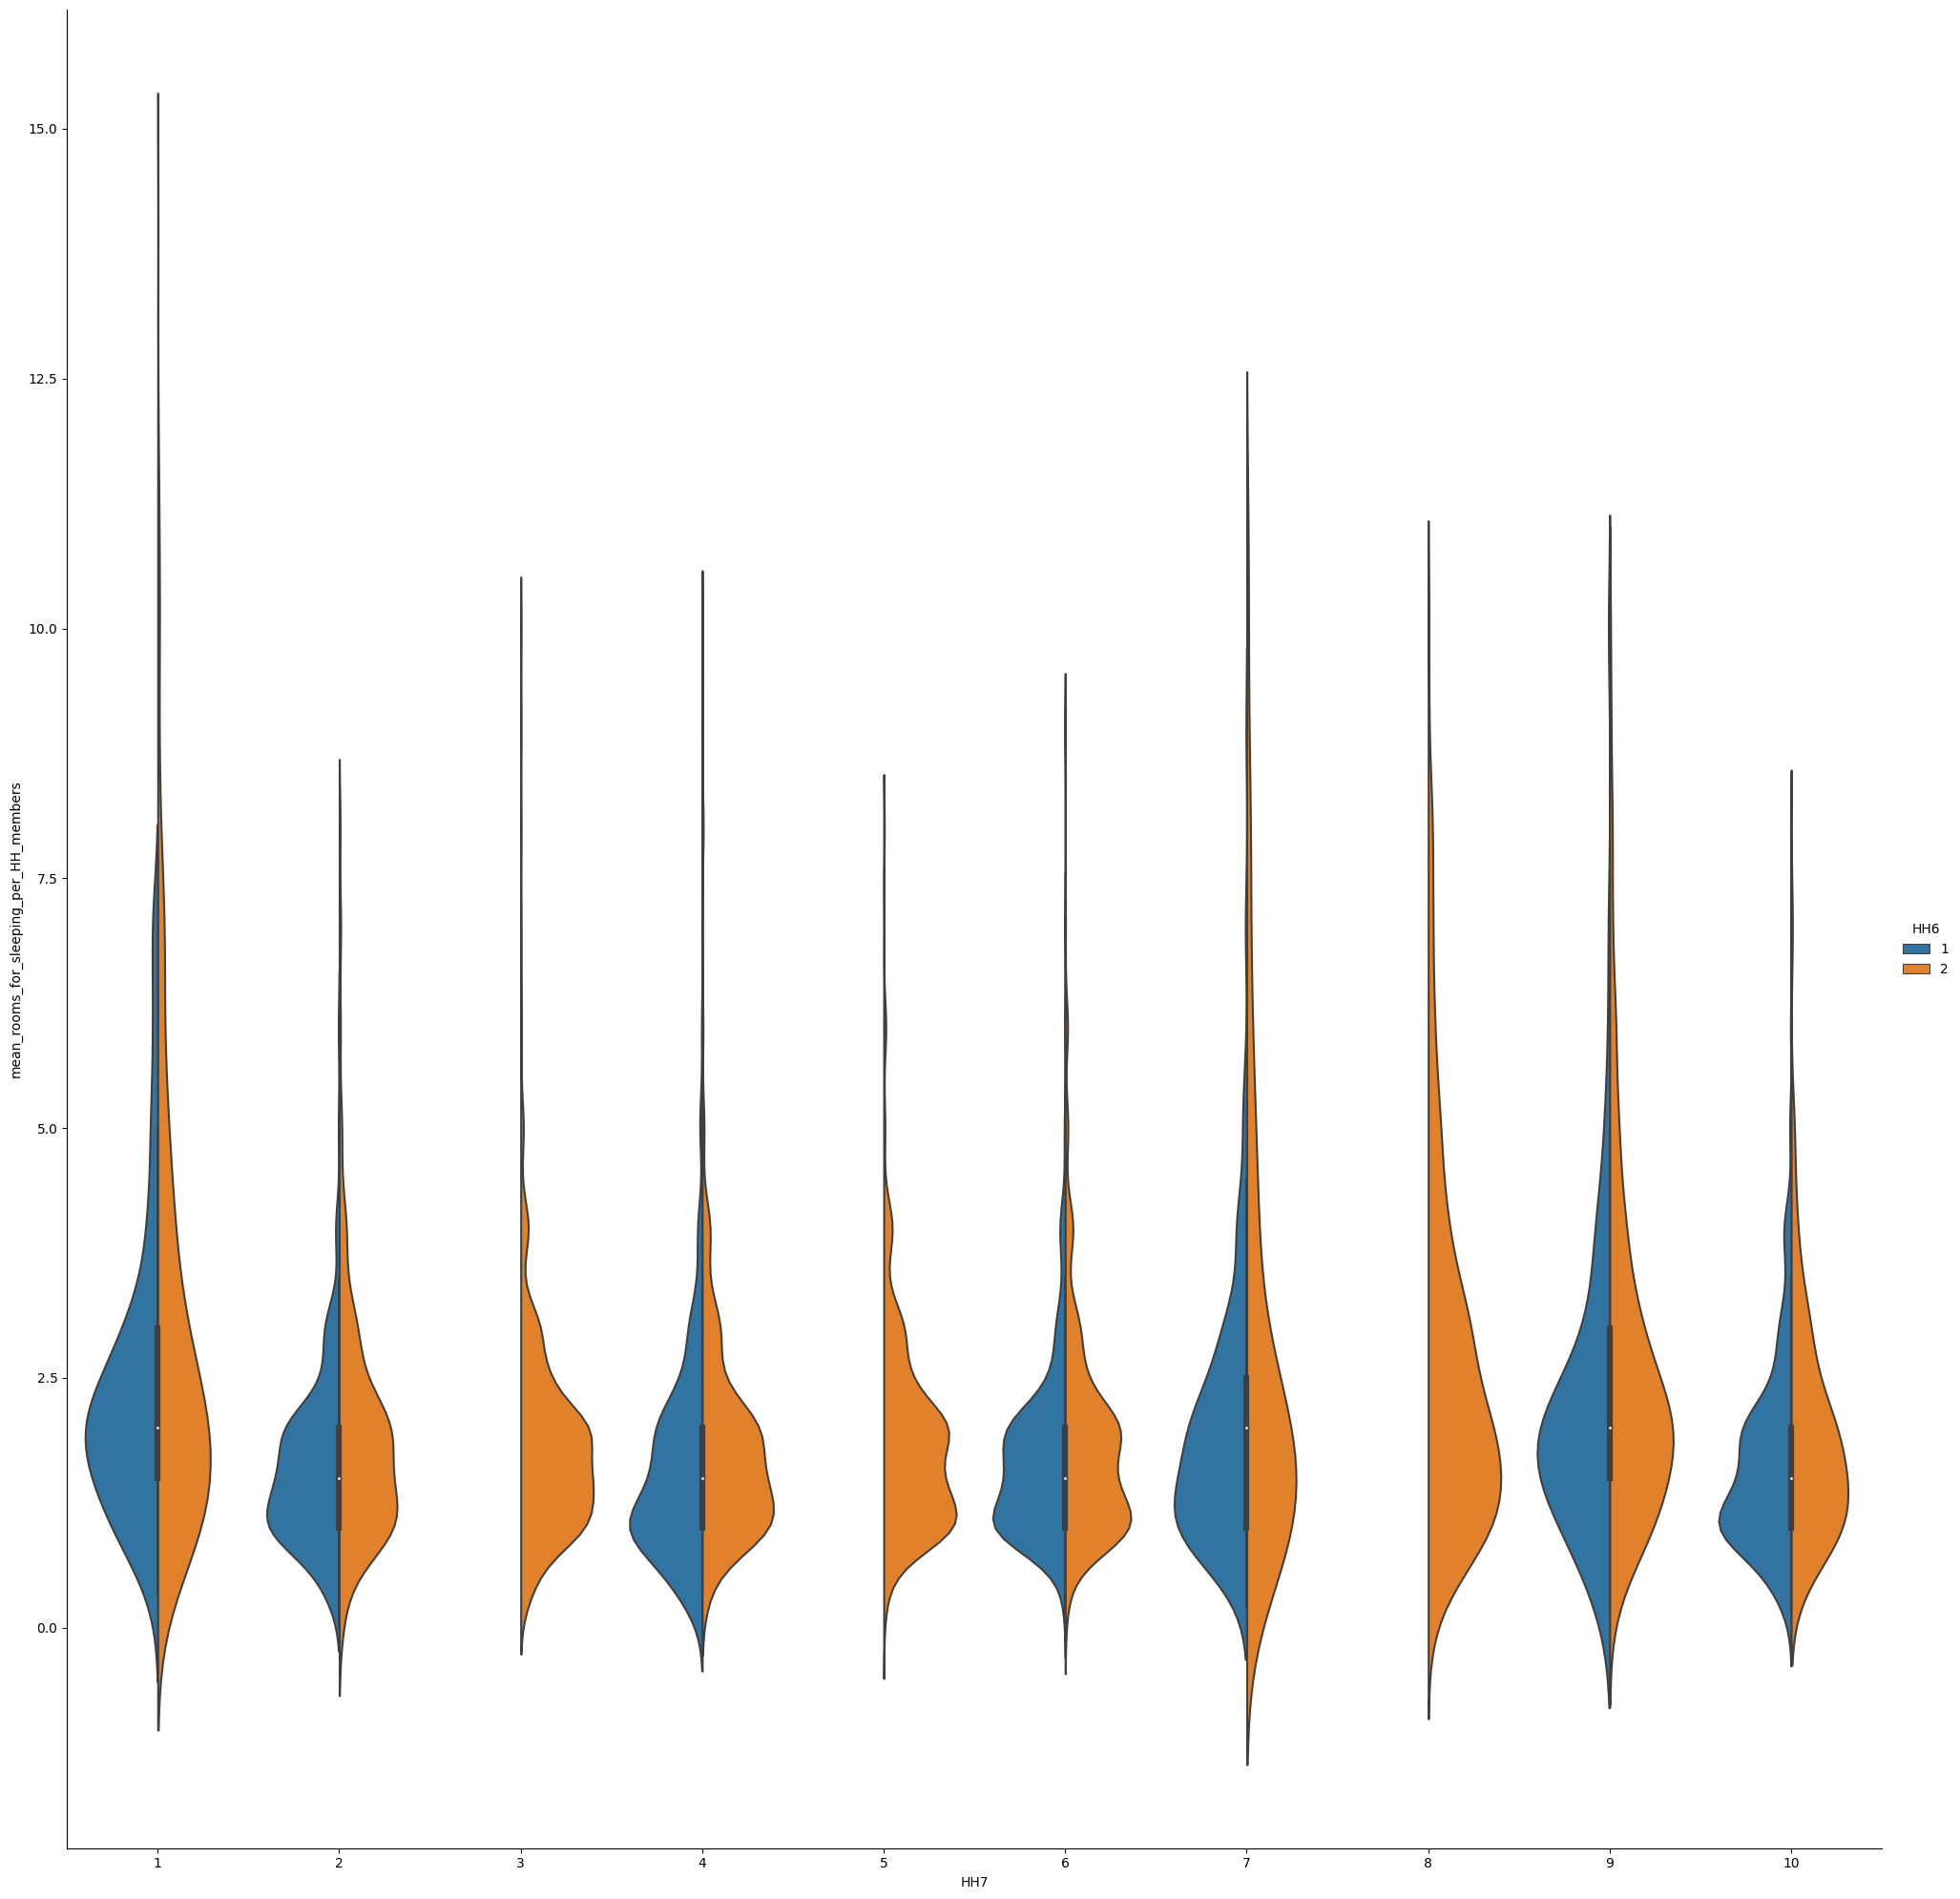

In [5]:
sns.catplot(
    data=df_0,
    height=20,
    x="HH7",
    y="mean_rooms_for_sleeping_per_HH_members",
    hue="HH6",
    kind="violin",
    # kind="swarm",
    split=True,
)